In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [6]:
bitcoin_data=pd.read_csv('btc0.csv')

In [7]:
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
bitcoin_data.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


<AxesSubplot:>

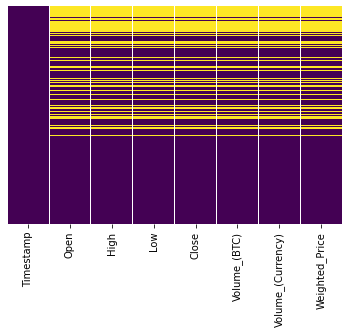

In [9]:
sns.heatmap(bitcoin_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, '$ Price')

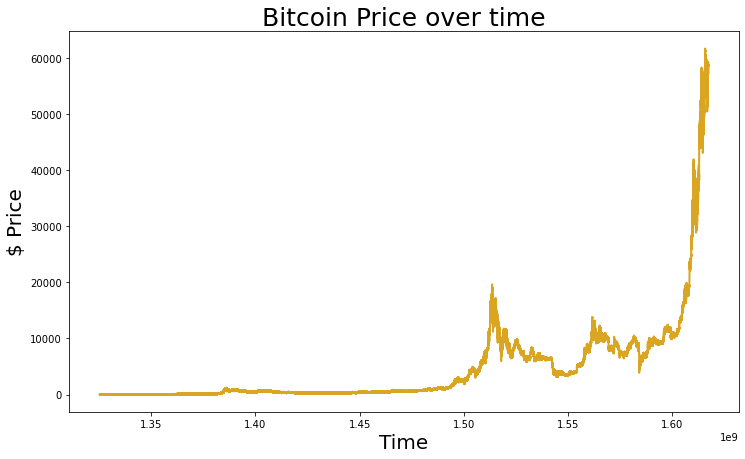

In [10]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_data["Timestamp"], bitcoin_data["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

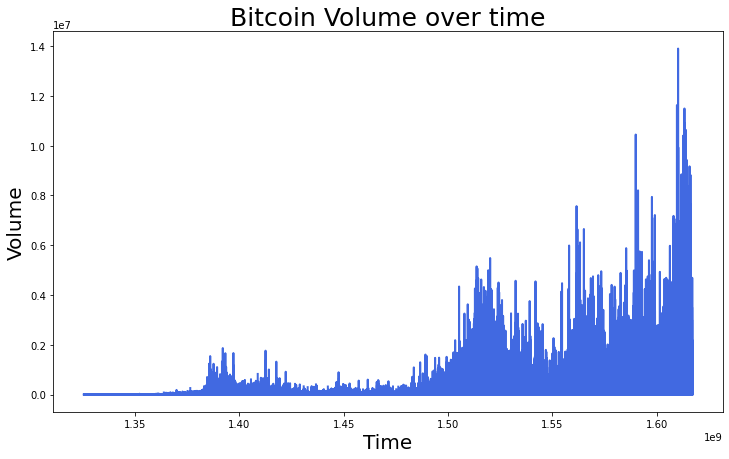

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_data["Timestamp"], bitcoin_data["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [12]:
bitcoin_data.shape

(4857377, 8)

In [13]:
bitcoin_data.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [25]:
bitcoin_data['Dates'] = pd.to_datetime(bitcoin_data['Timestamp'], unit='s')
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [15]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Dates              datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 333.5 MB


<AxesSubplot:>

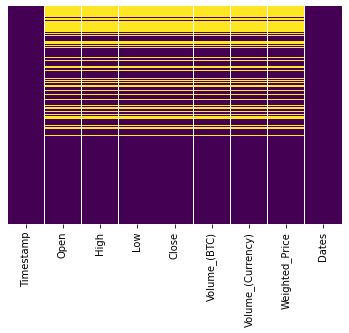

In [16]:
sns.heatmap(bitcoin_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
required_features =bitcoin_data [['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
output_label = bitcoin_data['Close']


In [24]:
bitcoin_data.dropna(inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(required_features,
output_label,test_size = 0.3)


In [26]:

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)



LinearRegression()

In [27]:
y_pred=regressor.predict(x_test)
print(y_pred)

[8397.269146   6177.07421021   10.47100788 ...  634.86558244 9220.59258195
  453.9377893 ]


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9999993539195228


In [29]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor,required_features,output_label,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-52.962669188285325


In [30]:
import statsmodels.api as sm
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [31]:
required_features=sm.add_constant(required_features)
print(required_features)


         const      Open      High       Low  Volume_(BTC)  Volume_(Currency)  \
0          1.0      4.39      4.39      4.39      0.455581           2.000000   
478        1.0      4.39      4.39      4.39     48.000000         210.720000   
547        1.0      4.50      4.57      4.50     37.862297         171.380338   
548        1.0      4.58      4.58      4.58      9.000000          41.220000   
1224       1.0      4.58      4.58      4.58      1.502000           6.879160   
...        ...       ...       ...       ...           ...                ...   
4857372    1.0  58714.31  58714.31  58686.00      1.384487       81259.372187   
4857373    1.0  58683.97  58693.43  58683.97      7.294848      428158.146640   
4857374    1.0  58693.43  58723.84  58693.43      1.705682      100117.070370   
4857375    1.0  58742.18  58770.38  58742.18      0.720415       42332.958633   
4857376    1.0  58767.75  58778.18  58755.97      2.712831      159417.751000   

         Weighted_Price  
0

In [32]:
model=sm.OLS(output_label,required_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.422e+11
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:30:40   Log-Likelihood:            -1.2258e+07
No. Observations:             3613769   AIC:                         2.452e+07
Df Residuals:                 3613762   BIC:                         2.452e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0043      0.005     -0.894      0.371      -0.014       0.005
Open                 -0.4819      0.000  -1144.739      0.000      -0.483      -0.481
High                  0.6697      0.001   1092.016      0.000       0.668       0.671
Low                   0.5794      0.001    946.467      0.000       0.578       0.581
Volume_(BTC)         -0.0011      0.000     -7.849      0.000      -0.001      -0.001
Volume_(Currency)  1.519e-07   3.47e-08      4.380      0.000    8.39e-08     2.2e-07
Weighted_Price        0.2328      0.001    246.756      0.000       0.231       0.235
==============================================================================
Omnibus:                  2633744.105   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      72233514945.036
Skew:                           1.554   Prob(JB):                         0.00
Kurtosis:                     695.613   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
required_features.iloc[:,1:].corr()

,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.999999,1.000000,0.999998,-0.051717,0.344498,0.999999
Low,0.999999,0.999998,1.000000,-0.052040,0.343541,1.000000
Volume_(BTC),-0.051860,-0.051717,-0.052040,1.000000,0.352038,-0.051887
Volume_(Currency),0.344074,0.344498,0.343541,0.352038,1.000000,0.344010
Weighted_Price,0.999999,0.999999,1.000000,-0.051887,0.344010,1.000000


# assumptions


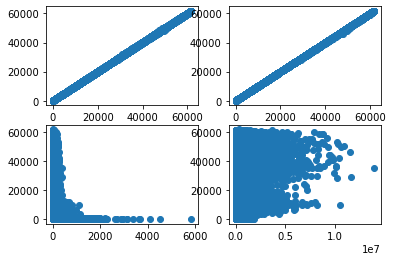

In [40]:
#checking for linear relationship
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
ax1.scatter(required_features['Open'],output_label)
ax2.scatter(required_features['High'],output_label)
ax3.scatter(required_features['Volume_(BTC)'],output_label)
ax4.scatter(required_features['Volume_(Currency)'],output_label)
plt.show()


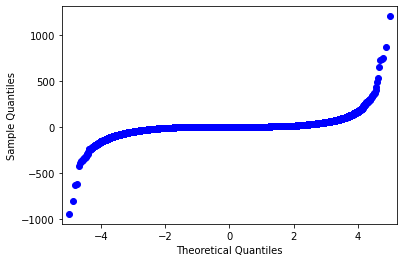

In [43]:
#normality of residuals
import statsmodels.api as sm
residuals = model.resid
sm.qqplot(residuals)
plt.show()

In [50]:
np.mean(residuals)

4.622514497214061e-10

In [47]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{required_features.columns[i] : variance_inflation_factor(required_features.values,i) 
for i in range(1,required_features.shape[1])}


{'Open': 1001871.5620967394,
 'High': 2129147.91401974,
 'Low': 2115132.61630773,
 'Volume_(BTC)': 1.1917633780803711,
 'Volume_(Currency)': 1.935465980109442,
 'Weighted_Price': 5031045.789374536}

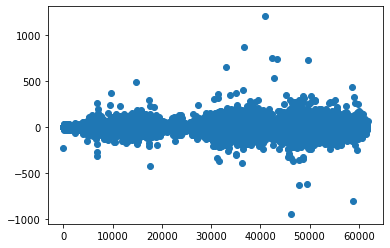

In [49]:
#checking homoscedasticity
plt.scatter(output_label, residuals)
plt.plot(output_label,[0]*len(output_label))